# РАБОЧАЯ ТЕТРАДЬ № 4

# Ильин Сергей БББО-07-20

## Рабочая тетрадь №4

Регрессия – это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение зависимой переменной у, при регрессионной связи одному и тому же значению независимой переменной (фактору) x могут соответствовать в зависимости от конкретного случая различные значения зависимой переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и Y связаны между собой вероятностной зависимостью: при каждом конкретном значении X=x величина Y является случайной величиной с вполне определённым распределением вероятностей. Зависимость зависимой переменной – отклика от одной независимой переменной – фактора или нескольких факторов называется уравнением регрессии. По количеству факторов выделяют парную (однофакторную) и множественную (многофакторную) регрессию. Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным. Цель регрессионного анализа состоит в определении общего вида уравнения регрессии, вычислении оценок неизвестных параметров, входящих в уравнение регрессии проверке статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических методов исследования влияния одной или нескольких независимых переменных X_1,…,X_n на зависимую переменную Y. Независимые переменные иначе называют регрессорами или предикторами, а зависимые переменные – критериальными переменными.

## 1.1. Теоретический материал – Линейные регрессионные модели

Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f (x) = b +m⋅x +, где m – наклон линии, а b – его сдвиг.

### Функция потерь — метод наименьших квадратов

Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

### Задача экраполяции

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:

numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

### 1.1.1 Пример

Задача:

Проведем прямую y = mx + b  через экспериментальные точки.

In [2]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
# Построим A по x:

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

0.9999999999999997 -0.949999999999999


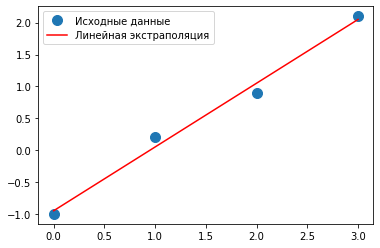

In [4]:
# Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)
# Построим график полученной прямлй и укажем на нем точки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

### 1.1.2 Пример

Задача:

Пусть x,y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома a,b,c по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

Решение:

[-4.69642192 -3.61580253 -2.94683874 -1.84605082 -0.98906451  0.2849044
  0.58841552  1.83225852  3.30106407  3.79462079  4.9029357 ]
[25.48375336 16.43308011  9.47520236  3.99020677  1.25665531 -0.17980657
  0.88474548  4.38391371  8.50104578 16.22813807 25.25620919]


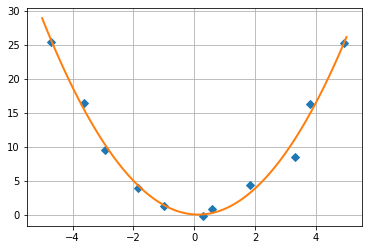

In [5]:
from numpy import *
from numpy.random import *
# генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

# записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)
# нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

### 1.1.3 Пример

Задача:

По данным предыдущего примера постройте эстраполяционного полинома третьего порядка:

Решение:

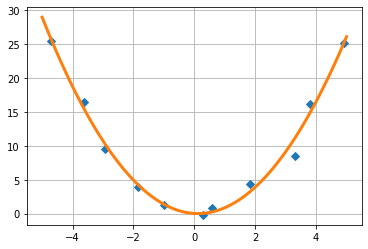

In [6]:
# нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### Задание:

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

### Решение:

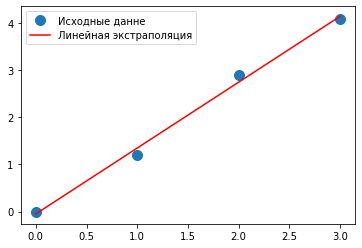

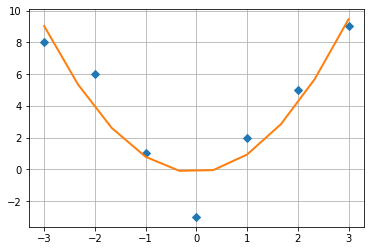

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

x=np.array([0, 1, 2, 3])
y=np.array([0, 1.2, 2.9, 4.1])

A=np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label='Исходные данне', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()



x=np.array([-3, -2, -1, 0, 1, 2, 3])
y=np.array([8, 6, 1, -3, 2, 5, 9])

m = vstack((x**2, x, ones(7))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-3, 3, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

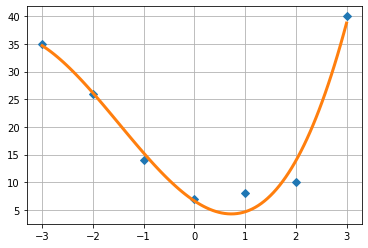

In [10]:
x=np.array([-3, -2, -1, 0, 1, 2, 3])
y=np.array([35, 26, 14, 7, 8, 10, 40])

m = vstack((x**3, x**2, x, ones(7))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-3, 3, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### 1.1.4 Пример

Задача:

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида f(x,b) = b0  + b1 exp(-b2x^2)

Решение:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5) 
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi 
xdata = np.linspace(0, 5, 50) 
# создаем теоретически правильные значения точек уі (без шума) 
y = f(xdata, *beta) 
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))

#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata 
from scipy.optimize import curve_fit 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
beta_opt

array([0.25506248, 0.75298411, 0.52079173])

0.00025295850071377883
0.12954667769139167


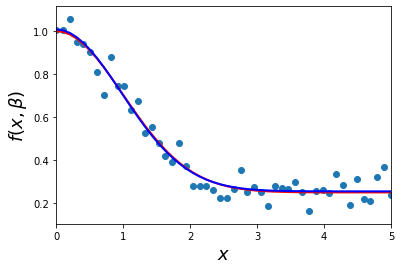

In [19]:
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0]) 
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2) 
print(fres)

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

### 1.1.5 Пример

Задача:

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

1) f(x,b) = b0  + b1 * x

2) f(x,b) = b0  + b1 * x + b2 * x^2

3) f(x,b) = b0  + b1 * n(x) 

4) f(x,b) = b0 * x^(b1)   

Решение:

[0.2459536  0.75450558]
0.00014502855502703568
0.1275251095149311


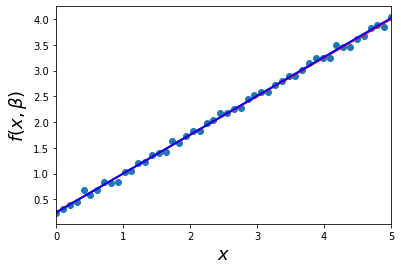

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#решение 
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75) 
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек xi 
xdata = np.linspace(0, 5, 50) 
# создаем теоретически правильные значения точек уі (без шума) 
y = f(xdata, *beta) 
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt) 
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0]) 
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 
print(fres)

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.23529066 0.75465568 0.49989437]
9.401094723873633e-05
0.07839528457127592


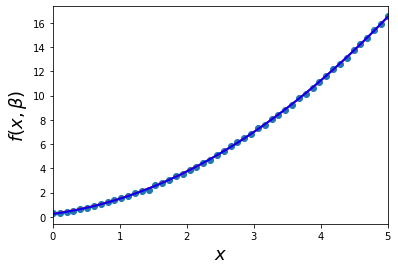

In [15]:
#решение 
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5) 
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив точек хі 
xdata = np.linspace(0, 5, 50) 
# создаем теоретически правильные значения точек уі (без шума) 
y = f(xdata, *beta) 
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt) 
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0]) 
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 
print(fres)

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.9603583  2.02463333]
6.0011961184743565e-05
0.1387741418408054


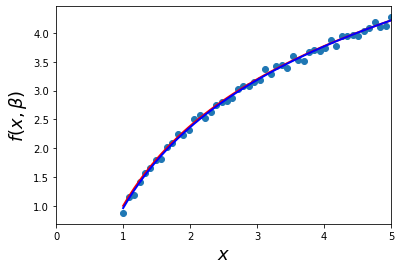

In [16]:
#решение 
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xi 
xdata = np.linspace(1, 5, 50) 
# создаем теоретически правильные значения точек уі (без шума) 
y = f(xdata, *beta) 
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt) 
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0]) 
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2) 
print(fres)

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[1.00378385 1.99764945]
3.816887694288016e-06
0.0896514661041084


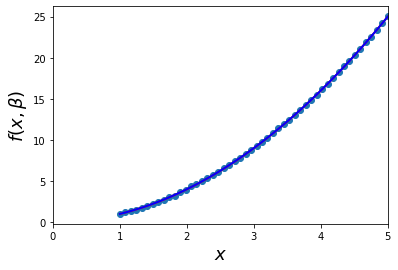

In [17]:
#решение 
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2) 
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек xi 
xdata = np. linspace(1, 5, 50) 
# создаем теоретически правильные значения точек уі (без шума) 
y = f(xdata, *beta) 
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt) 
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0]) 
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2) 
print(fres)

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

### Задание:

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

### Решение:

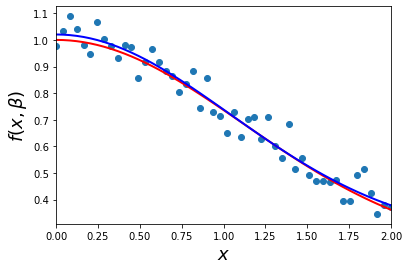

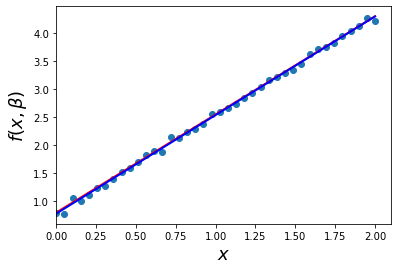

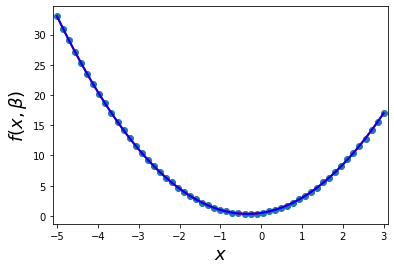

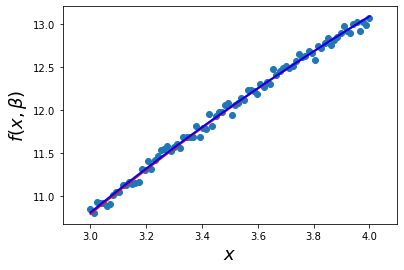

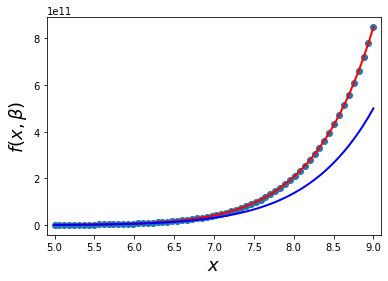

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
beta = (0.2, 0.8, 0.4) 
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0, 2, 50) 
y = f(xdata, *beta) 
ydata = y + 0.05 * np.random.randn(len(xdata))
 
from scipy.optimize import curve_fit 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
 
lin_dev = sum(beta_cov[0]) 
 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2) 

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 2,5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()



beta = (0.8, 1.75) 
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 2, 40) 
y = f(xdata, *beta) 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)  
lin_dev = sum(beta_cov[0]) 

residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 2.1) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()



beta = (0.5, 1, 1.5) 
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(-5, 3, 55) 
y = f(xdata, *beta) 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)  
lin_dev = sum(beta_cov[0]) 

residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(-5.1, 3.1) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()



beta = (2, 8) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(3, 4, 88) 
y = f(xdata, *beta) 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
lin_dev = sum(beta_cov[0]) 
 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2) 

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(2.9, 4.1) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()



beta = (3, 12) 
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np. linspace(5, 9, 66) 
y = f(xdata, *beta) 
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)  
lin_dev = sum(beta_cov[0]) 
 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2) 

fig, ax = plt.subplots() 
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(4.9, 9.1) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

## 1.2. Теоретический материал – Задачи регрессии

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имеем дело с множественной линейной регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

### 1.2.1 Пример

Задача:

Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

Решение:

In [2]:
#Импортируем необходимые библиотеки 
#используем pandas и питру для обработки данных, 
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import DataFrame,Series 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью 
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
                             5.00,5.50],
           'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict) 
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [24]:
#Исследуем набор данных 
print(dataset.shape) 
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


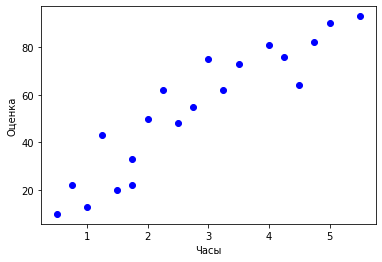

In [23]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы") 
plt.ylabel("Оценка") 
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

Решение:

In [30]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы. 
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии 
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

#приведем получившиеся коэффициенты для линии регрессии 
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

Решение:

In [31]:
y_pred = regressor.predict(X_test) 
# сравним фактические значения с прогнозируемыми 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


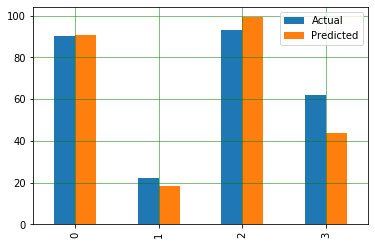

In [32]:
# визуализируем результат сравнения в виде гистограммы 
df.plot(kind='bar') 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

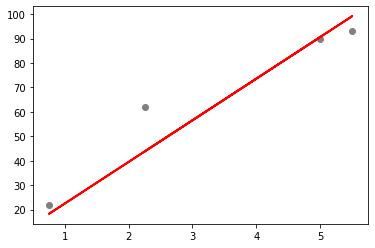

In [33]:
#построим линию регрессии с тестовыми данными 
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.show()

### Задание:

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.

### Решение:

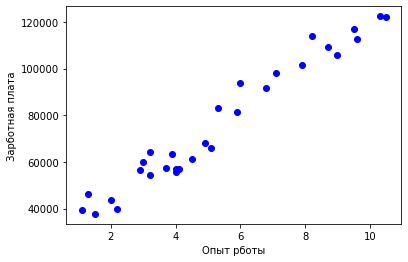

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.099150628186
[9312.57512673]


In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import DataFrame,Series 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

my_dict = {'Опыт рботы': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3,
                         5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
           'Зарботная плата': [39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00,
                              57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00,
                              81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00,
                              112635.00, 122391.00, 121872.00]}

plt.scatter(dataset['Опыт рботы'], dataset['Зарботная плата'], color = 'b', 
            label = "зависимость заработной платы от опыта работы")
plt.xlabel("Опыт рботы") 
plt.ylabel("Зарботная плата") 
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

Получившийся результат можно интерпретировать следующим образом: каждый год работы увеличивает зарботную плату 
приблизительно на 9312.

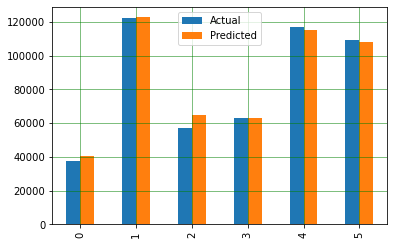

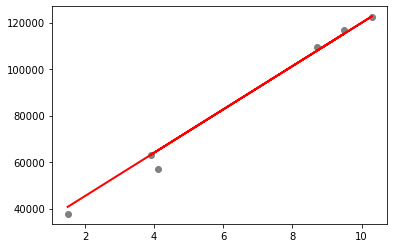

In [7]:
y_pred = regressor.predict(X_test) 
# сравним фактические значения с прогнозируемыми 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

df.plot(kind='bar') 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.show()

## 1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

### 1.3.1 Пример

Задача:

Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

Решение:

In [35]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
       [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], 
       [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np. transpose(X) # transpose so input vectors 
X = np.c_[X, np.ones(X.shape[0])] # add bias term 
linreg = np.linalg.lstsq(X, y, rcond=None)[0] 
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn. Рассмотрим пример.

### 1.3.2 Пример

Задача:

Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

Решение:

In [36]:
#Импортируем необходимые библиотеки 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], 
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
# формируем DataFrame из двух списков 
new_y = np.array(y) 
new_y = new_y.transpose() 
df1 = pd.DataFrame(new_y) 
new_X = np.array(X) 
new_X = new_X.transpose() 
df2 = pd. DataFrame(new_X) 
df1 = df1.rename(columns = {0: 'y'}, inplace = False) 
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2] 
dataset = pd.concat([df1, df2], axis=1, join="inner") 
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [37]:
# изучим данные 
print(dataset.shape) 
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [39]:
# разделим данные на метки и атрибуты 
X = dataset[['x1', 'x2', 'x3']] 
y = dataset['y']

# разделим данные на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() классaLinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

#выведем коэффициенты модели 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [40]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код 
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [41]:
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


### Задание

#### Задача:

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


#### Решение:

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

data=pd.read_csv('C:/Users/iamse/Desktop/petrol_consumption.csv')

x = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
print(coeff_df)

y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df)

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

                              Coefficient
Petrol_tax                     -40.016660
Average_income                  -0.065413
Paved_Highways                  -0.004741
Population_Driver_licence(%)  1341.862121
    Actual   Predicted
29     534  469.391989
4      410  545.645464
26     577  589.668394
30     571  569.730413
32     577  649.774809
37     704  646.631164
34     487  511.608148
40     587  672.475177
7      467  502.074782
10     580  501.270734
Mean Squared Error: 4666.344787588363


### Задание*

#### Задача:

Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов. 

#### Решение:

Вариант 10
x =  [0.  0.2 0.4 0.6 0.8 1. ]
y =  [4.28571429 4.17142857 4.05714286 3.94285714 3.82857143 3.71428571]


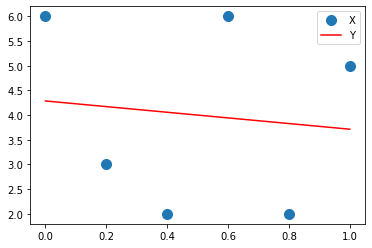

x =  [0.  0.2 0.4 0.6 0.8 1. ]
y =  [5.35714286 3.95714286 3.2        3.08571429 3.61428571 4.78571429]


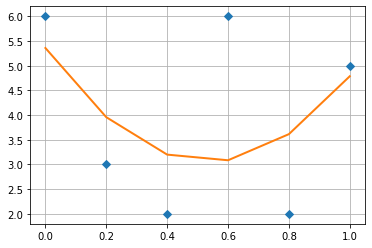

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

print('Вариант 10')

x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([6, 3, 2, 6, 2, 5])

A =np.vstack([x, np.ones(len(x))]).T

m,c=np.linalg.lstsq(A, y, rcond = None)[0]

print('x = ', x)
print('y = ', m*x +c)

plt.plot(x, y, 'o', label='X', markersize=10)
plt.plot(x, m*x +c, 'r', label='Y')
plt.legend()
plt.show()

m=vstack((x**2, x, ones(6))).T
s=np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(0, 1, 6)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()

print('x = ', x)
print('y = ', s[0]*x_prec**2+s[1]*x_prec+s[2])